# Title

___

### small title

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectPercentile, f_classif
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

### Reading data

In [3]:
data = pd.read_csv('pd_speech_features.csv')
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
data[['id','gender','PPE','DFA']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      756 non-null    int64  
 1   gender  756 non-null    int64  
 2   PPE     756 non-null    float64
 3   DFA     756 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 23.8 KB


In [5]:
data[data.columns[:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  756 non-null    int64  
 1   gender              756 non-null    int64  
 2   PPE                 756 non-null    float64
 3   DFA                 756 non-null    float64
 4   RPDE                755 non-null    float64
 5   numPulses           755 non-null    float64
 6   numPeriodsPulses    755 non-null    float64
 7   meanPeriodPulses    755 non-null    float64
 8   stdDevPeriodPulses  755 non-null    float64
 9   locPctJitter        755 non-null    float64
 10  locAbsJitter        754 non-null    float64
 11  rapJitter           755 non-null    float64
 12  ppq5Jitter          754 non-null    float64
 13  ddpJitter           755 non-null    float64
 14  locShimmer          755 non-null    float64
 15  locDbShimmer        755 non-null    object 
 16  apq3Shim

In [6]:
data[data.columns[20:40]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   meanAutoCorrHarmonicity     755 non-null    float64
 1   meanNoiseToHarmHarmonicity  754 non-null    float64
 2   meanHarmToNoiseHarmonicity  755 non-null    float64
 3   minIntensity                755 non-null    float64
 4   maxIntensity                755 non-null    object 
 5   meanIntensity               755 non-null    float64
 6   f1                          755 non-null    float64
 7   f2                          755 non-null    float64
 8   f3                          755 non-null    float64
 9   f4                          755 non-null    float64
 10  b1                          755 non-null    float64
 11  b2                          755 non-null    float64
 12  b3                          755 non-null    float64
 13  b4                          755 non

In [7]:
for i in range(0,755,20):
    print(data[data.columns[i:i+20]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  756 non-null    int64  
 1   gender              756 non-null    int64  
 2   PPE                 756 non-null    float64
 3   DFA                 756 non-null    float64
 4   RPDE                755 non-null    float64
 5   numPulses           755 non-null    float64
 6   numPeriodsPulses    755 non-null    float64
 7   meanPeriodPulses    755 non-null    float64
 8   stdDevPeriodPulses  755 non-null    float64
 9   locPctJitter        755 non-null    float64
 10  locAbsJitter        754 non-null    float64
 11  rapJitter           755 non-null    float64
 12  ppq5Jitter          754 non-null    float64
 13  ddpJitter           755 non-null    float64
 14  locShimmer          755 non-null    float64
 15  locDbShimmer        755 non-null    object 
 16  apq3Shim

In [8]:
# with open('DataAnalysis.txt','w') as f:
#     for i in range(0,755,20):
#         f.write(str(data[data.columns[i:i+20]].info()))
#         f.write('\n')

### Data Cleaning: Finding Nulls & Invalid Data

In [9]:
DataNulls = dict(data.isna().sum())
DataNulls

{'id': 0,
 'gender': 0,
 'PPE': 0,
 'DFA': 0,
 'RPDE': 1,
 'numPulses': 1,
 'numPeriodsPulses': 1,
 'meanPeriodPulses': 1,
 'stdDevPeriodPulses': 1,
 'locPctJitter': 1,
 'locAbsJitter': 2,
 'rapJitter': 1,
 'ppq5Jitter': 2,
 'ddpJitter': 1,
 'locShimmer': 1,
 'locDbShimmer': 1,
 'apq3Shimmer': 1,
 'apq5Shimmer': 1,
 'apq11Shimmer': 1,
 'ddaShimmer': 1,
 'meanAutoCorrHarmonicity': 1,
 'meanNoiseToHarmHarmonicity': 2,
 'meanHarmToNoiseHarmonicity': 1,
 'minIntensity': 1,
 'maxIntensity': 1,
 'meanIntensity': 1,
 'f1': 1,
 'f2': 1,
 'f3': 1,
 'f4': 1,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'GQ_prc5_95': 1,
 'GQ_std_cycle_open': 1,
 'GQ_std_cycle_closed': 1,
 'GNE_mean': 1,
 'GNE_std': 1,
 'GNE_SNR_TKEO': 1,
 'GNE_SNR_SEO': 1,
 'GNE_NSR_TKEO': 1,
 'GNE_NSR_SEO': 1,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_

In [10]:
ExistigNulls = {k:v for k,v in zip(DataNulls.keys(),DataNulls.values()) if v!=0}
ExistigNulls

{'RPDE': 1,
 'numPulses': 1,
 'numPeriodsPulses': 1,
 'meanPeriodPulses': 1,
 'stdDevPeriodPulses': 1,
 'locPctJitter': 1,
 'locAbsJitter': 2,
 'rapJitter': 1,
 'ppq5Jitter': 2,
 'ddpJitter': 1,
 'locShimmer': 1,
 'locDbShimmer': 1,
 'apq3Shimmer': 1,
 'apq5Shimmer': 1,
 'apq11Shimmer': 1,
 'ddaShimmer': 1,
 'meanAutoCorrHarmonicity': 1,
 'meanNoiseToHarmHarmonicity': 2,
 'meanHarmToNoiseHarmonicity': 1,
 'minIntensity': 1,
 'maxIntensity': 1,
 'meanIntensity': 1,
 'f1': 1,
 'f2': 1,
 'f3': 1,
 'f4': 1,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'GQ_prc5_95': 1,
 'GQ_std_cycle_open': 1,
 'GQ_std_cycle_closed': 1,
 'GNE_mean': 1,
 'GNE_std': 1,
 'GNE_SNR_TKEO': 1,
 'GNE_SNR_SEO': 1,
 'GNE_NSR_TKEO': 1,
 'GNE_NSR_SEO': 1,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_en

In [11]:
SortedExsitingNulls = sorted(ExistigNulls.items(), key=lambda x:x[1], reverse=True)
SortedExsitingNulls = {i[0]:i[1] for i in SortedExsitingNulls}
SortedExsitingNulls

{'det_LT_TKEO_std_6_coef': 534,
 'locAbsJitter': 2,
 'ppq5Jitter': 2,
 'meanNoiseToHarmHarmonicity': 2,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_energy': 2,
 'mean_MFCC_0th_coef': 2,
 'mean_MFCC_1st_coef': 2,
 'mean_MFCC_2nd_coef': 2,
 'mean_MFCC_3rd_coef': 2,
 'mean_MFCC_4th_coef': 2,
 'mean_MFCC_5th_coef': 2,
 'mean_MFCC_6th_coef': 2,
 'mean_MFCC_7th_coef': 2,
 'mean_MFCC_8th_coef': 2,
 'mean_MFCC_9th_coef': 2,
 'mean_MFCC_10th_coef': 2,
 'mean_MFCC_11th_coef': 2,
 'mean_MFCC_12th_coef': 2,
 'mean_delta_log_energy': 2,
 'mean_0th_delta': 2,
 'mean_1st_delta': 2,
 'mean_2nd_delta': 2,
 'mean_3rd_delta': 2,
 'mean_4th_delta': 2,
 'mean_5th_delta': 2,
 'mean_6th_delta': 2,
 'mean_7th_delta': 2,
 'mean_8th_delta': 2,
 'mean_9th_delta': 2,
 'mean_10th_delta': 2,
 

In [12]:
data.drop(['det_LT_TKEO_std_6_coef'],axis=1,inplace=True)

In [13]:
NullsInRows = dict(data.isnull().sum(axis=1))
SortedNullsInRows = sorted(NullsInRows.items(), key=lambda x:x[1], reverse=True)
SortedNullsInRows = {i[0]:i[1] for i in SortedNullsInRows}
SortedNullsInRows
# no row: no of nulls in the row

{152: 193,
 220: 155,
 22: 1,
 45: 1,
 82: 1,
 0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,

In [14]:
data.drop([152,220],axis=0,inplace=True)

In [15]:
DataNulls = dict(data.isna().sum())
DataNulls

{'id': 0,
 'gender': 0,
 'PPE': 0,
 'DFA': 0,
 'RPDE': 0,
 'numPulses': 0,
 'numPeriodsPulses': 0,
 'meanPeriodPulses': 0,
 'stdDevPeriodPulses': 0,
 'locPctJitter': 0,
 'locAbsJitter': 1,
 'rapJitter': 0,
 'ppq5Jitter': 1,
 'ddpJitter': 0,
 'locShimmer': 0,
 'locDbShimmer': 0,
 'apq3Shimmer': 0,
 'apq5Shimmer': 0,
 'apq11Shimmer': 0,
 'ddaShimmer': 0,
 'meanAutoCorrHarmonicity': 0,
 'meanNoiseToHarmHarmonicity': 1,
 'meanHarmToNoiseHarmonicity': 0,
 'minIntensity': 0,
 'maxIntensity': 0,
 'meanIntensity': 0,
 'f1': 0,
 'f2': 0,
 'f3': 0,
 'f4': 0,
 'b1': 0,
 'b2': 0,
 'b3': 0,
 'b4': 0,
 'GQ_prc5_95': 0,
 'GQ_std_cycle_open': 0,
 'GQ_std_cycle_closed': 0,
 'GNE_mean': 0,
 'GNE_std': 0,
 'GNE_SNR_TKEO': 0,
 'GNE_SNR_SEO': 0,
 'GNE_NSR_TKEO': 0,
 'GNE_NSR_SEO': 0,
 'VFER_mean': 0,
 'VFER_std': 0,
 'VFER_entropy': 0,
 'VFER_SNR_TKEO': 0,
 'VFER_SNR_SEO': 0,
 'VFER_NSR_TKEO': 0,
 'VFER_NSR_SEO': 0,
 'IMF_SNR_SEO': 0,
 'IMF_SNR_TKEO': 0,
 'IMF_SNR_entropy': 0,
 'IMF_NSR_SEO': 0,
 'IMF_NSR_

In [16]:
ExistigNulls = {k:v for k,v in zip(DataNulls.keys(),DataNulls.values()) if v!=0}
ExistigNulls

{'locAbsJitter': 1, 'ppq5Jitter': 1, 'meanNoiseToHarmHarmonicity': 1}

In [17]:
data.dropna(inplace=True)

In [18]:
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [19]:
data.reset_index(inplace=True)
data.drop(['index','id'],axis=1,inplace=True)
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
747,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
748,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
749,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [20]:
dict(data[['DFA','RPDE','numPulses','numPeriodsPulses']].dtypes)

{'DFA': dtype('float64'),
 'RPDE': dtype('float64'),
 'numPulses': dtype('float64'),
 'numPeriodsPulses': dtype('float64')}

In [21]:
ColTypes = dict(data.dtypes)
ColTypes = {k:str(v) for k,v in zip(ColTypes.keys(),ColTypes.values())}
ColTypes

{'gender': 'int64',
 'PPE': 'float64',
 'DFA': 'float64',
 'RPDE': 'float64',
 'numPulses': 'float64',
 'numPeriodsPulses': 'float64',
 'meanPeriodPulses': 'float64',
 'stdDevPeriodPulses': 'float64',
 'locPctJitter': 'float64',
 'locAbsJitter': 'float64',
 'rapJitter': 'float64',
 'ppq5Jitter': 'float64',
 'ddpJitter': 'float64',
 'locShimmer': 'float64',
 'locDbShimmer': 'object',
 'apq3Shimmer': 'float64',
 'apq5Shimmer': 'float64',
 'apq11Shimmer': 'float64',
 'ddaShimmer': 'float64',
 'meanAutoCorrHarmonicity': 'float64',
 'meanNoiseToHarmHarmonicity': 'float64',
 'meanHarmToNoiseHarmonicity': 'float64',
 'minIntensity': 'float64',
 'maxIntensity': 'object',
 'meanIntensity': 'float64',
 'f1': 'float64',
 'f2': 'float64',
 'f3': 'float64',
 'f4': 'float64',
 'b1': 'float64',
 'b2': 'float64',
 'b3': 'float64',
 'b4': 'float64',
 'GQ_prc5_95': 'float64',
 'GQ_std_cycle_open': 'float64',
 'GQ_std_cycle_closed': 'float64',
 'GNE_mean': 'float64',
 'GNE_std': 'float64',
 'GNE_SNR_TKEO

In [22]:
WrongCols = {k:v for k,v in zip(ColTypes.keys(),ColTypes.values()) if v == 'object'}
WrongCols

{'locDbShimmer': 'object', 'maxIntensity': 'object'}

In [23]:
for i in data['locDbShimmer'].tolist():
    try:
        a = float(i)
    except:
        print(i)

1.13#4


In [24]:
data['locDbShimmer'] = data['locDbShimmer'].replace('1.13#4','1.134')

In [25]:
for i in data['locDbShimmer'].tolist():
    try:
        a = float(i)
    except:
        print(i)

In [26]:
for i in data['maxIntensity'].tolist():
    try:
        a = float(i)
    except:
        print(i)

66.13744a406


In [27]:
data['maxIntensity'] = data['maxIntensity'].replace('66.13744a406','66.13744406')

In [28]:
for i in data['maxIntensity'].tolist():
    try:
        a = float(i)
    except:
        print(i)

In [29]:
data['locDbShimmer'] = data['locDbShimmer'].astype(float)
data['maxIntensity'] = data['maxIntensity'].astype(float)

In [30]:
data[['locDbShimmer','maxIntensity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   locDbShimmer  751 non-null    float64
 1   maxIntensity  751 non-null    float64
dtypes: float64(2)
memory usage: 11.9 KB


### Outliers

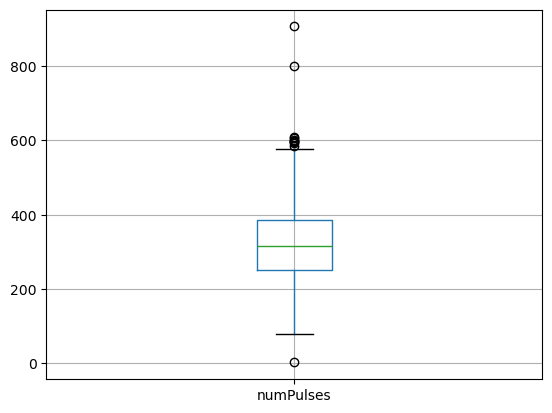

In [31]:
data.boxplot('numPulses')
plt.show()

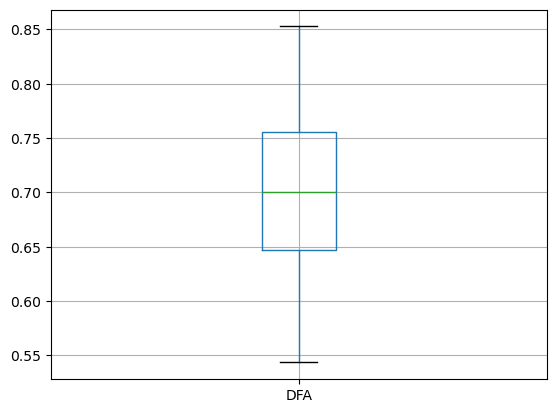

In [32]:
data.boxplot('DFA')
plt.show()

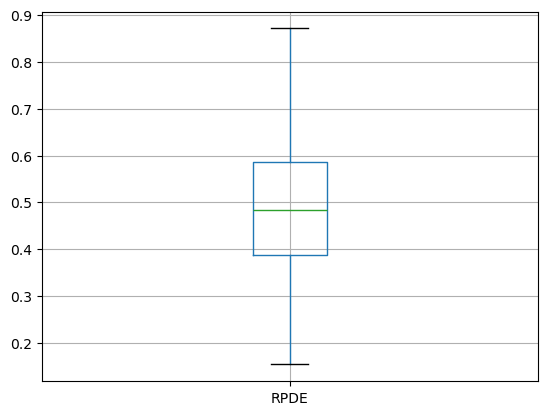

In [33]:
data.boxplot('RPDE')
plt.show()

In [34]:
for x in ['DFA','RPDE','numPulses']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    print(f'For {x} Min Outliers has {data.loc[data[x] < min,x].shape[0]} rows and Max has {data.loc[data[x] > max,x].shape[0]} rows')
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

data = data.dropna(axis=0)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)
data

For DFA Min Outliers has 0 rows and Max has 0 rows
For RPDE Min Outliers has 0 rows and Max has 0 rows
For numPulses Min Outliers has 1 rows and Max has 10 rows


C:\Users\Farida\AppData\Local\Temp\ipykernel_3552\1321198590.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['index'],axis=1,inplace=True)


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
736,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
737,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
738,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


### Feature Extraction

In [35]:
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
736,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
737,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
738,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [36]:
def getSignalType(mean,std,pct,abs):
    result = ((float(mean)*5) + (float(std)*17) - (float(pct)*3)) / (float(abs)+0.6)
    if result < 0.05:
        return 'Weak'
    elif result < 0.1:
        return 'Medium'
    else:
        return 'Strong'
    
data['SingalType'] = data.apply(lambda x: getSignalType(x['meanPeriodPulses'],
                                                       x['stdDevPeriodPulses'],
                                                       x['locPctJitter'],
                                                       x['locAbsJitter']), axis=1)

C:\Users\Farida\AppData\Local\Temp\ipykernel_3552\825544538.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SingalType'] = data.apply(lambda x: getSignalType(x['meanPeriodPulses'],


In [37]:
data['SingalType'].value_counts()

SingalType
Weak      417
Medium    283
Strong     40
Name: count, dtype: int64

In [38]:
data['SingalType'] = data['SingalType'].replace({'Weak':0,'Medium':1,'Strong':2})
data['SingalType'].value_counts()

C:\Users\Farida\AppData\Local\Temp\ipykernel_3552\2431195547.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SingalType'] = data['SingalType'].replace({'Weak':0,'Medium':1,'Strong':2})
C:\Users\Farida\AppData\Local\Temp\ipykernel_3552\2431195547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SingalType'] = data['SingalType'].replace({'Weak':0,'Medium':1,'Strong':2})


SingalType
0    417
1    283
2     40
Name: count, dtype: int64

### Feature Selection

In [39]:
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class,SingalType
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1,2


In [40]:
data['class'].value_counts()

class
1    556
0    184
Name: count, dtype: int64

In [41]:
x = data.drop(['class'],axis=1)
y = data['class']

In [42]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=13)
x_selected = FeatureSelection.fit_transform(x,y)
newData = pd.DataFrame(x_selected,columns = [i for i,j in zip(x.columns,FeatureSelection.get_support()) if j])
newData

,DFA,minIntensity,f1,mean_MFCC_2nd_coef,std_4th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,...,tqwt_minValue_dec_15,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_maxValue_dec_15,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_36
0,0.71826,69.997496,539.342735,2.48740,0.060808,0.028830,0.042253,0.028115,0.047180,0.035775,...,-0.19432,0.025222,0.022796,0.024286,0.048924,0.105750,0.20486,1.6058,1.5466,18.9405
1,0.69481,67.415903,564.363615,2.89860,0.076312,0.050259,0.037071,0.022166,0.039071,0.030383,...,-0.17254,0.063234,0.080975,0.099695,0.112210,0.121580,0.18155,1.5772,1.5530,45.1780
2,0.67604,62.661706,548.444604,3.22080,0.089970,0.054611,0.051511,0.032326,0.047357,0.031811,...,-0.15447,0.011110,0.013810,0.026241,0.039886,0.081818,0.17028,1.5921,1.5399,4.7666
3,0.79672,76.306989,819.529588,3.10230,0.046017,0.035774,0.035142,0.032577,0.024291,0.032300,...,-0.84814,0.117990,0.111290,0.122970,0.273530,0.567740,0.83417,1.8829,6.9761,4.0603
4,0.79782,76.645686,846.796144,2.94510,0.047531,0.029721,0.033943,0.031989,0.026002,0.028222,...,-0.86047,0.072172,0.086621,0.102950,0.235860,0.567490,0.74186,1.8821,7.8832,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.56355,79.991789,881.915768,-1.97830,0.034891,0.028405,0.039347,0.032791,0.036182,0.030312,...,-0.97303,0.219250,0.300560,0.463150,0.646970,0.983470,0.98274,10.1906,3.4394,6.8671
736,0.56499,70.191330,907.787590,-1.45210,0.071296,0.056871,0.051124,0.041971,0.034773,0.057365,...,-1.11390,0.131910,0.136800,0.270620,0.727660,1.012000,1.31670,22.4043,19.6733,28.4170
737,0.72335,75.091300,687.046383,-1.13730,0.036927,0.026838,0.038261,0.029193,0.031031,0.030826,...,-0.32554,0.128820,0.168010,0.277380,0.348020,0.318670,0.30577,2.3279,137.3126,5.0424
738,0.74890,76.168804,771.948334,-0.17925,0.038955,0.039557,0.032910,0.027188,0.030468,0.031574,...,-0.33709,0.102050,0.116660,0.211770,0.265250,0.266000,0.35645,1.6052,5.4425,3.7131


In [43]:
newData['class'] = y
newData

,DFA,minIntensity,f1,mean_MFCC_2nd_coef,std_4th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,...,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_maxValue_dec_15,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_36,class
0,0.71826,69.997496,539.342735,2.48740,0.060808,0.028830,0.042253,0.028115,0.047180,0.035775,...,0.025222,0.022796,0.024286,0.048924,0.105750,0.20486,1.6058,1.5466,18.9405,1
1,0.69481,67.415903,564.363615,2.89860,0.076312,0.050259,0.037071,0.022166,0.039071,0.030383,...,0.063234,0.080975,0.099695,0.112210,0.121580,0.18155,1.5772,1.5530,45.1780,1
2,0.67604,62.661706,548.444604,3.22080,0.089970,0.054611,0.051511,0.032326,0.047357,0.031811,...,0.011110,0.013810,0.026241,0.039886,0.081818,0.17028,1.5921,1.5399,4.7666,1
3,0.79672,76.306989,819.529588,3.10230,0.046017,0.035774,0.035142,0.032577,0.024291,0.032300,...,0.117990,0.111290,0.122970,0.273530,0.567740,0.83417,1.8829,6.9761,4.0603,1
4,0.79782,76.645686,846.796144,2.94510,0.047531,0.029721,0.033943,0.031989,0.026002,0.028222,...,0.072172,0.086621,0.102950,0.235860,0.567490,0.74186,1.8821,7.8832,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.56355,79.991789,881.915768,-1.97830,0.034891,0.028405,0.039347,0.032791,0.036182,0.030312,...,0.219250,0.300560,0.463150,0.646970,0.983470,0.98274,10.1906,3.4394,6.8671,0
736,0.56499,70.191330,907.787590,-1.45210,0.071296,0.056871,0.051124,0.041971,0.034773,0.057365,...,0.131910,0.136800,0.270620,0.727660,1.012000,1.31670,22.4043,19.6733,28.4170,0
737,0.72335,75.091300,687.046383,-1.13730,0.036927,0.026838,0.038261,0.029193,0.031031,0.030826,...,0.128820,0.168010,0.277380,0.348020,0.318670,0.30577,2.3279,137.3126,5.0424,0
738,0.74890,76.168804,771.948334,-0.17925,0.038955,0.039557,0.032910,0.027188,0.030468,0.031574,...,0.102050,0.116660,0.211770,0.265250,0.266000,0.35645,1.6052,5.4425,3.7131,0


In [44]:
newData.to_csv('smallData.csv')

### Visualization

In [45]:
def KPlot(feature):
    global data
    fig , ax = plt.subplots(figsize=(10,6))
    sns.kdeplot(data[feature],fill=True)
    plt.show()

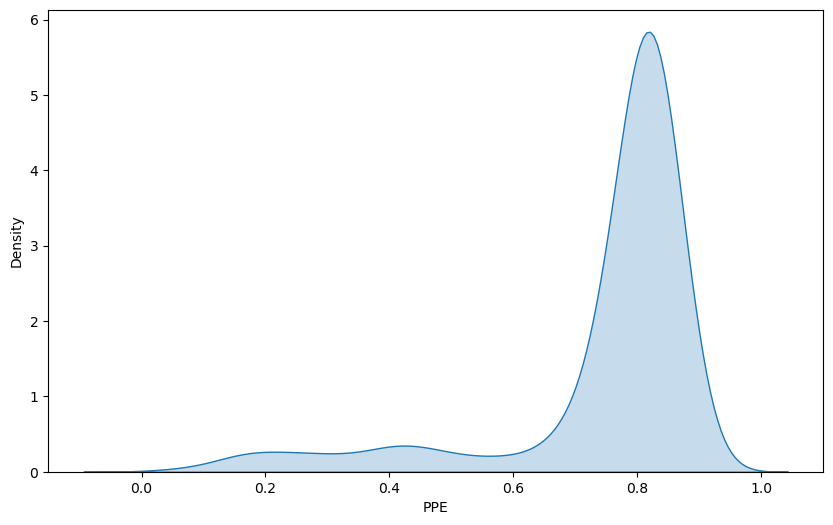

In [46]:
KPlot('PPE')

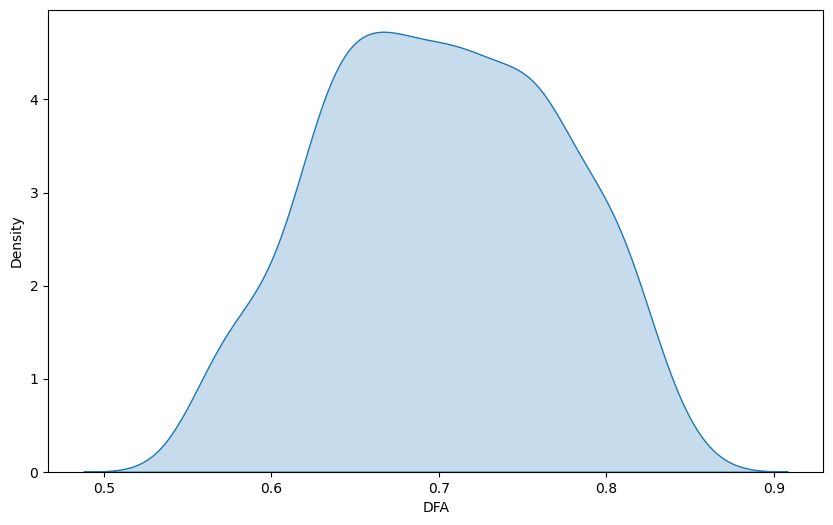

In [47]:
KPlot('DFA')

In [48]:
def RelKPlot(feature,FirstName,SecondName,SelectedFeature,FirstValue,SecondValue):
    global data
    fig ,ax = plt.subplots(figsize=(30,8))
    
    plt.subplot(1,3,1)
    plt.title('Total')
    Data = data
    sns.kdeplot(Data[feature],fill=True)

    plt.subplot(1,3,2)
    plt.title(FirstName)
    Data = data[data[SelectedFeature]==FirstValue]
    sns.kdeplot(Data[feature],fill=True)
    
    plt.subplot(1,3,3)
    plt.title(SecondName)
    Data = data[data[SelectedFeature]==SecondValue]
    sns.kdeplot(Data[feature],fill=True)
    plt.show()

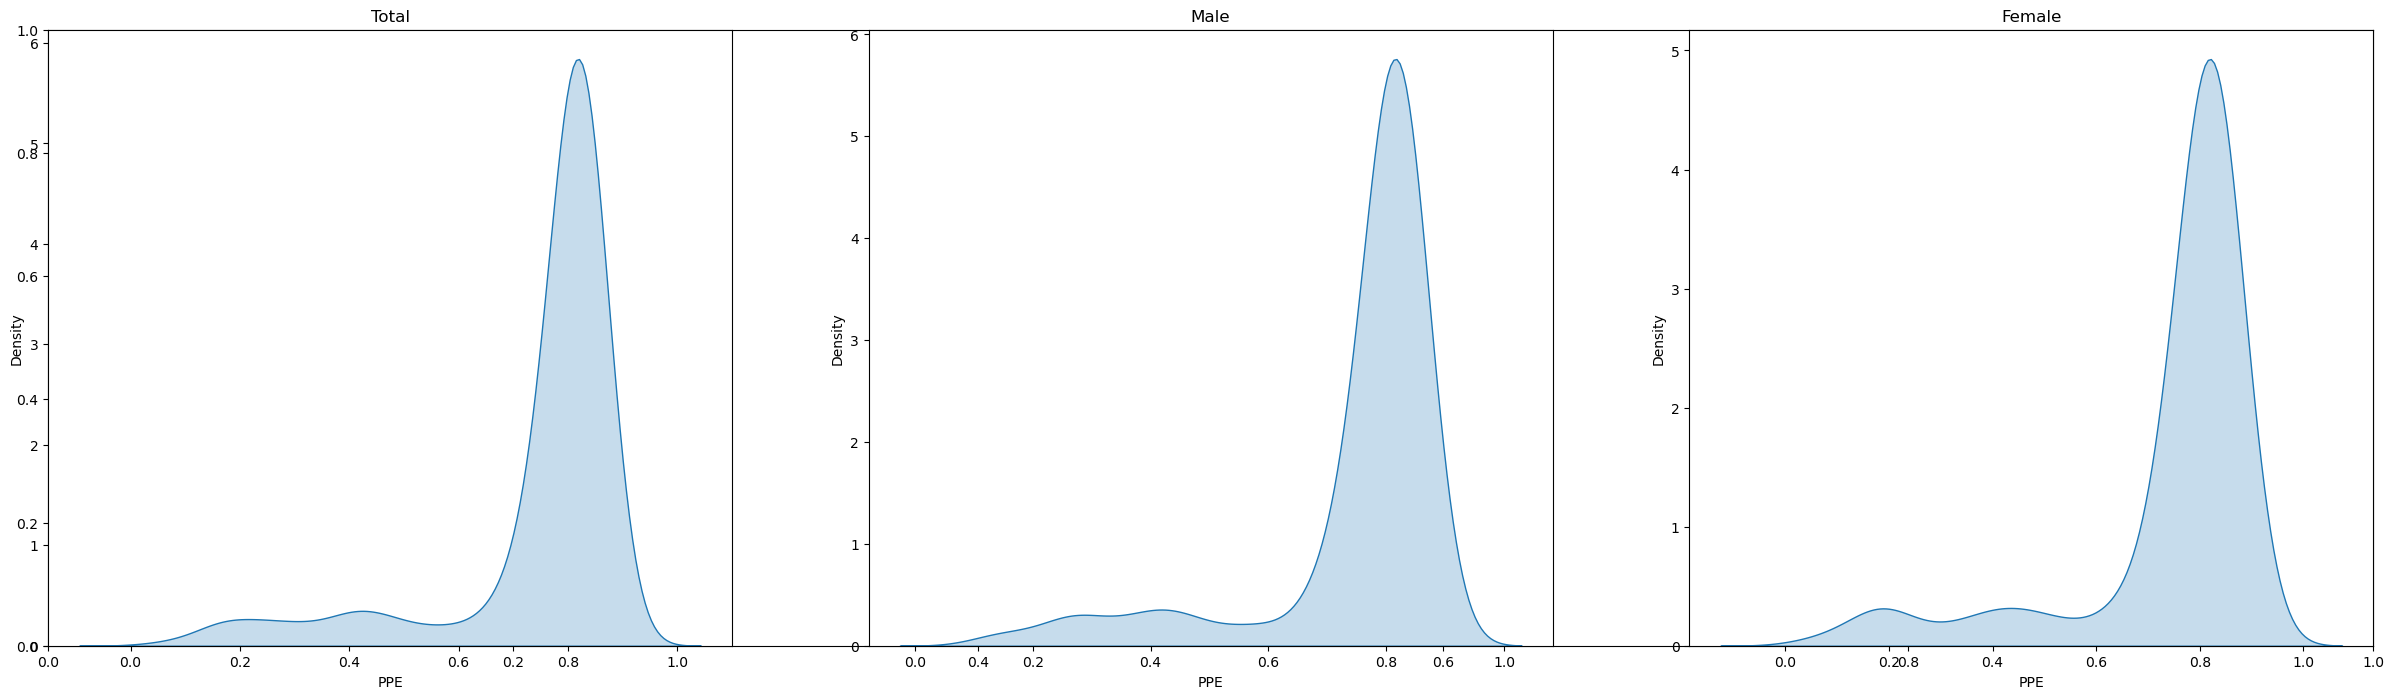

In [49]:
RelKPlot('PPE','Male','Female','gender',1,0)

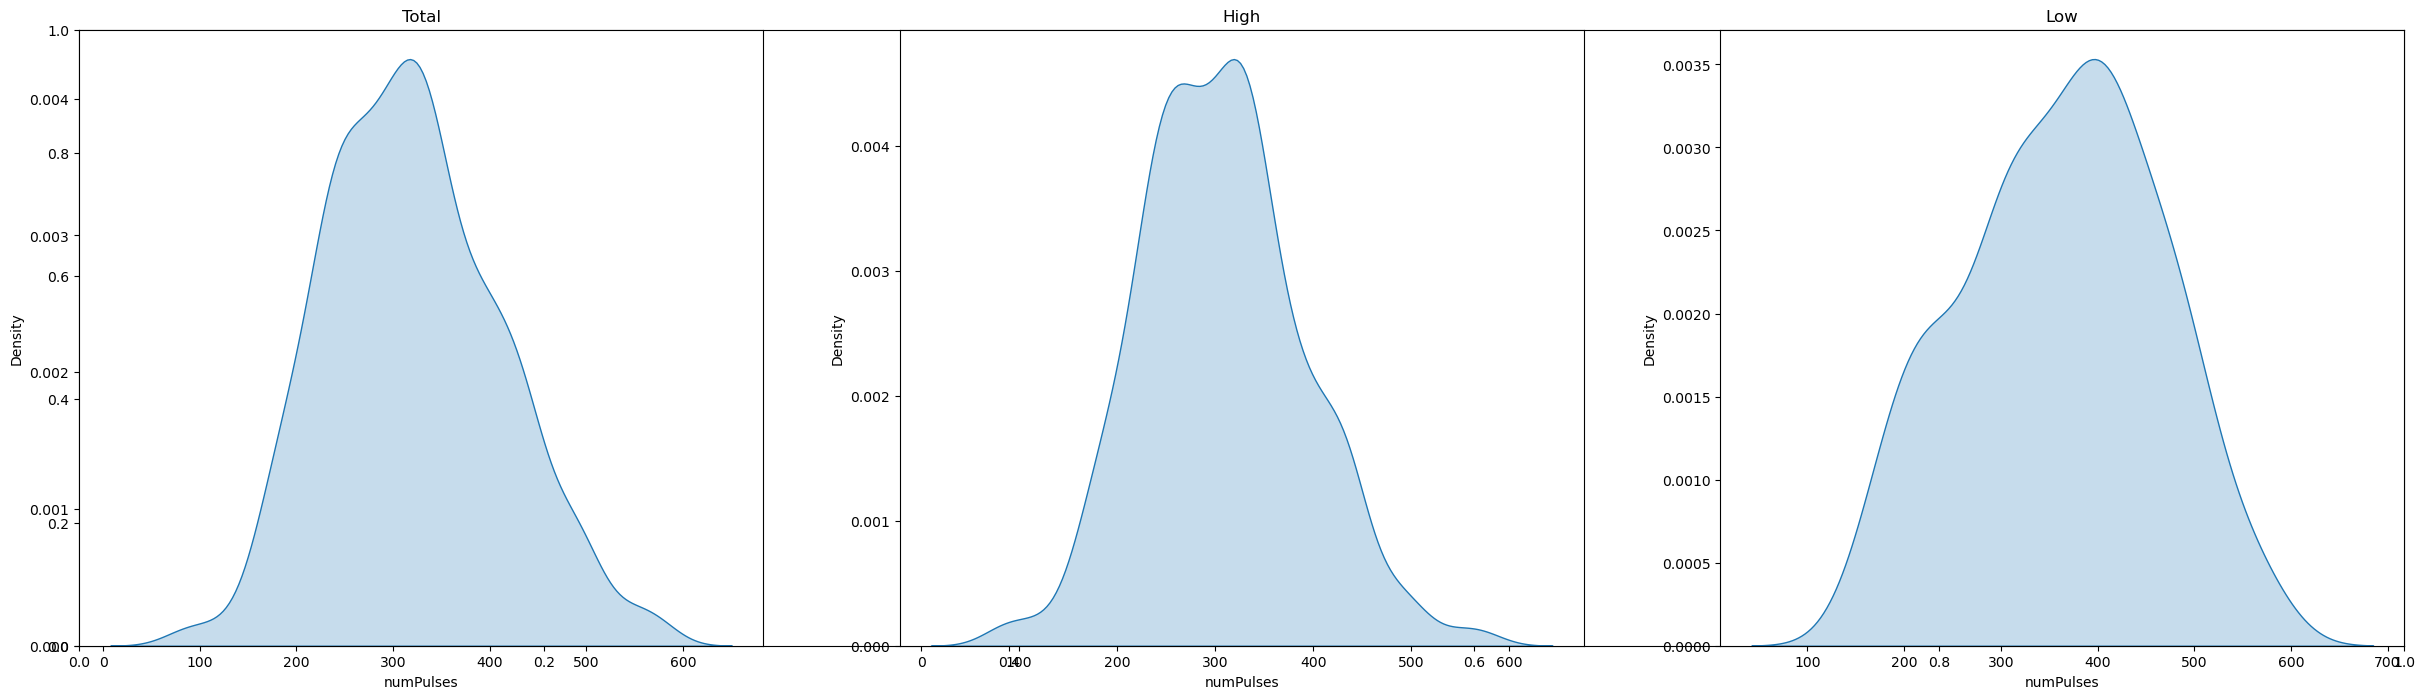

In [50]:
RelKPlot('numPulses','High','Low','class',1,0)

In [51]:
def BPlot(feature1,feature2 = None,hue=None):
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 == None and hue==None:
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif feature2 != None and hue == None:
        sns.boxplot(x=data[feature1],y=data[feature2],width=0.3,color='r')
    elif feature2 != None and hue != None:
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
    plt.show()

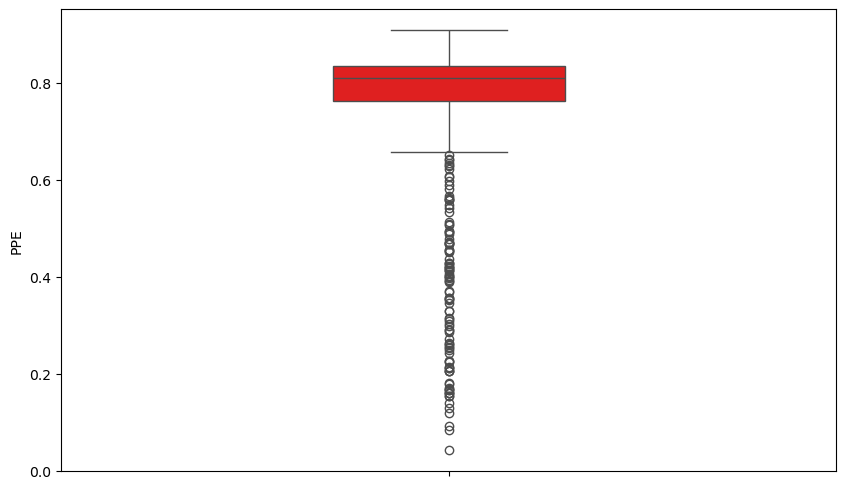

In [52]:
BPlot('PPE')

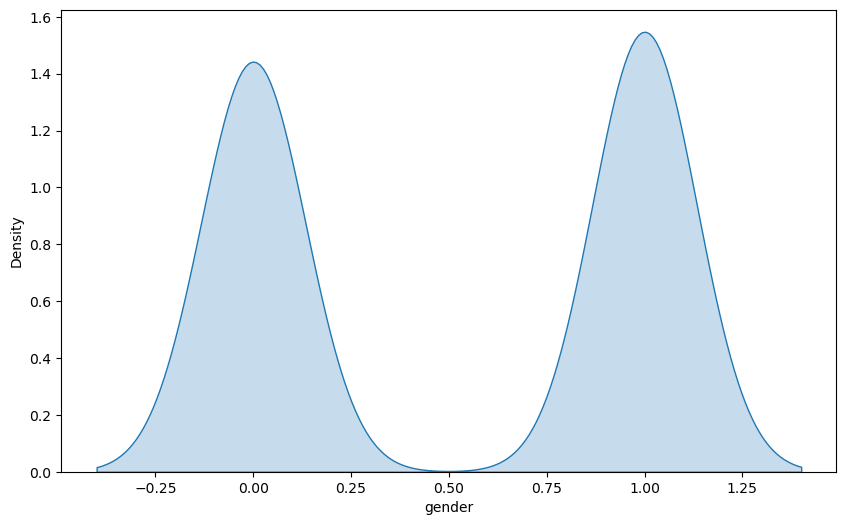

In [53]:
KPlot('gender')

In [54]:
def CPlot(feature):
    global data
    fig , ax = plt.subplots(figsize=(8,4))
    sns.countplot(x=feature,data=data,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("dark",3))
    plt.show()

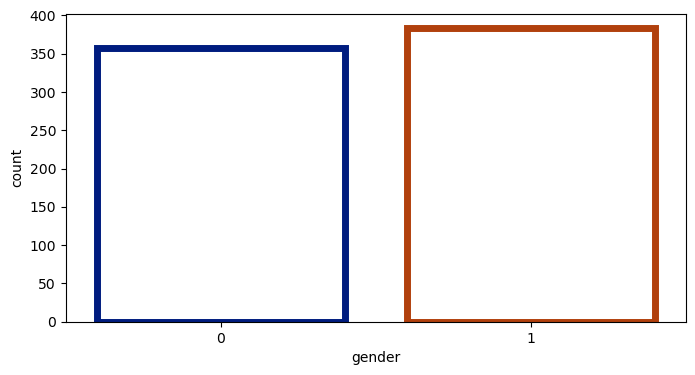

In [55]:
CPlot('gender')

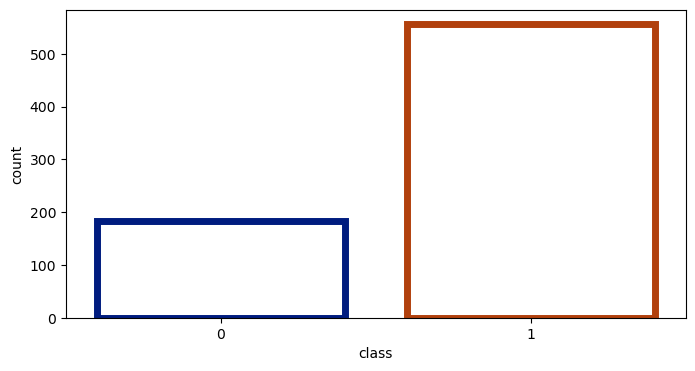

In [56]:
CPlot('class')

In [57]:
def selectedFeatureCPlot(feature, FirstName, SecondName, SelectedFeature, FirstValue, SecondValue):
    global data
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot 1: Total count plot
    plt.subplot(1, 3, 1)
    plt.title('Total')
    sns.countplot(x=feature, data=data, facecolor=(0, 0, 0, 0), linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

    # Plot 2: Count plot for the first subset
    plt.subplot(1, 3, 2)
    plt.title(FirstName)
    subset_data = data[data[SelectedFeature] == FirstValue]  # Filtered data for FirstValue
    sns.countplot(x=feature, data=subset_data, facecolor=(0, 0, 0, 0), linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

    # Plot 3: Count plot for the second subset
    plt.subplot(1, 3, 3)
    plt.title(SecondName)
    subset_data = data[data[SelectedFeature] == SecondValue]  # Filtered data for SecondValue
    sns.countplot(x=feature, data=subset_data, facecolor=(0, 0, 0, 0), linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

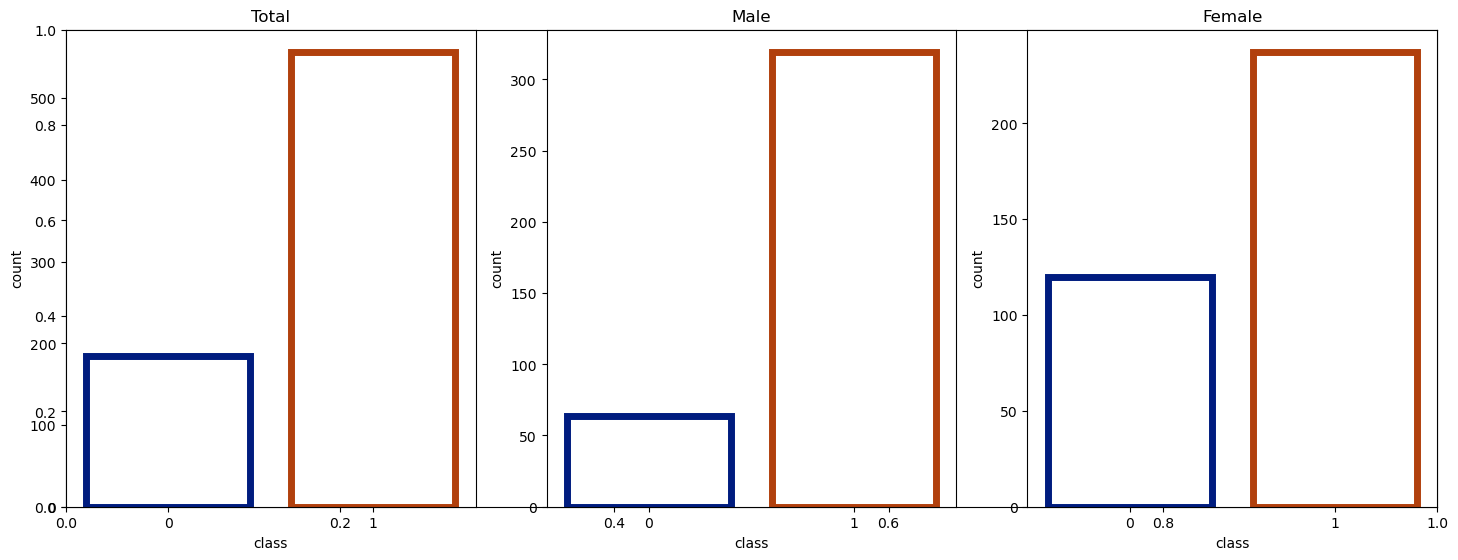

In [58]:
selectedFeatureCPlot('class','Male','Female','gender',1,0)

In [59]:
def pie(feature,limit=10):
    global data
    fig , ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:limit],
           labels=list(data[feature].value_counts()[:limit].index),
            autopct='%1.2f%%',labeldistance=1.1,explode =[0.05 for i in range(len(data[feature].value_counts()[:limit]))] )
    plt.show()

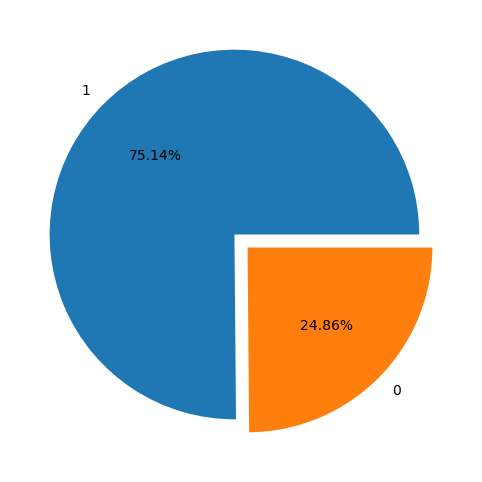

In [60]:
pie('class')

### Building The Model

In [61]:
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class,SingalType
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1,2


In [62]:
x = data.drop(['class'],axis=1)
y = data['class']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44,shuffle=True)

print("X train shape is : ",x_train.shape)
print("X test shape is : ",x_test.shape)
print("Y train shape is : ",y_train.shape)
print("Y test shape is : ",x_test.shape)

X train shape is :  (555, 753)
X test shape is :  (185, 753)
Y train shape is :  (555,)
Y test shape is :  (185, 753)


In [67]:
RandomForestClassifierModel = RandomForestClassifier(criterion='gini',n_estimators=300,max_depth=7, random_state=33)
RandomForestClassifierModel.fit(x_train,y_train)
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [68]:
y_test.values

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [69]:
results = []
for pred , actual in zip(y_pred,y_test.values):
    if pred == actual:
        results.append('Correct')
    else:
        results.append('InCorrect')
pd.Series(results).value_counts()

Correct      156
InCorrect     29
Name: count, dtype: int64

In [72]:
CM = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is :\n",CM)

Confusion Matrix is :
 [[ 23  28]
 [  1 133]]


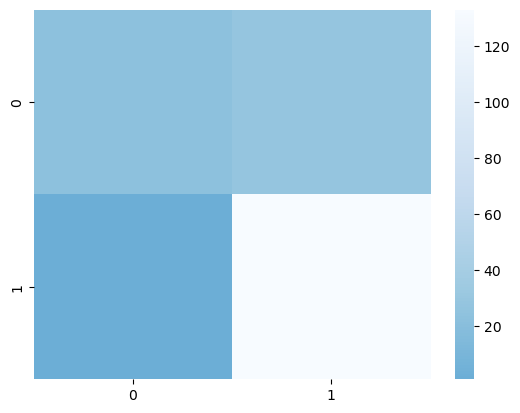

In [73]:
sns.heatmap(CM, center=True,cmap='Blues_r')
plt.show()

In [75]:
ClassificationReport = classification_report(y_test,y_pred)
print("Classification Report is :\n",ClassificationReport)

Classification Report is :
               precision    recall  f1-score   support

           0       0.96      0.45      0.61        51
           1       0.83      0.99      0.90       134

    accuracy                           0.84       185
   macro avg       0.89      0.72      0.76       185
weighted avg       0.86      0.84      0.82       185



In [77]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=7)
x_selected = FeatureSelection.fit_transform(x,y)
newX = pd.DataFrame(x_selected,columns = [i for i,j in zip(x.columns,FeatureSelection.get_support()) if j])
newX

,f1,mean_MFCC_2nd_coef,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_delta_delta_log_energy,std_6th_delta_delta,...,tqwt_minValue_dec_12,tqwt_minValue_dec_13,tqwt_minValue_dec_14,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27
0,539.342735,2.48740,0.028830,0.042253,0.028115,0.047180,0.035775,0.020827,0.016392,0.014642,...,-0.024286,-0.048924,-0.108390,0.025222,0.022796,0.024286,0.048924,0.105750,1.6058,1.5466
1,564.363615,2.89860,0.050259,0.037071,0.022166,0.039071,0.030383,0.032360,0.014222,0.025500,...,-0.099695,-0.112210,-0.101340,0.063234,0.080975,0.099695,0.112210,0.121580,1.5772,1.5530
2,548.444604,3.22080,0.054611,0.051511,0.032326,0.047357,0.031811,0.036249,0.039709,0.024607,...,-0.026241,-0.039886,-0.081836,0.011110,0.013810,0.026241,0.039886,0.081818,1.5921,1.5399
3,819.529588,3.10230,0.035774,0.035142,0.032577,0.024291,0.032300,0.029051,0.015560,0.017274,...,-0.129990,-0.268930,-0.586380,0.117990,0.111290,0.122970,0.273530,0.567740,1.8829,6.9761
4,846.796144,2.94510,0.029721,0.033943,0.031989,0.026002,0.028222,0.030469,0.011037,0.013791,...,-0.115900,-0.227210,-0.505800,0.072172,0.086621,0.102950,0.235860,0.567490,1.8821,7.8832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,881.915768,-1.97830,0.028405,0.039347,0.032791,0.036182,0.030312,0.029681,0.004271,0.012046,...,-0.491410,-0.651480,-0.974550,0.219250,0.300560,0.463150,0.646970,0.983470,10.1906,3.4394
736,907.787590,-1.45210,0.056871,0.051124,0.041971,0.034773,0.057365,0.039443,0.035989,0.023391,...,-0.369920,-0.591670,-1.129400,0.131910,0.136800,0.270620,0.727660,1.012000,22.4043,19.6733
737,687.046383,-1.13730,0.026838,0.038261,0.029193,0.031031,0.030826,0.024491,0.006292,0.013633,...,-0.298120,-0.357650,-0.335780,0.128820,0.168010,0.277380,0.348020,0.318670,2.3279,137.3126
738,771.948334,-0.17925,0.039557,0.032910,0.027188,0.030468,0.031574,0.027947,0.010716,0.016464,...,-0.190990,-0.269840,-0.296620,0.102050,0.116660,0.211770,0.265250,0.266000,1.6052,5.4425


In [78]:
x_train,x_test,y_train,y_test = train_test_split(newX,y,test_size=0.25,random_state=44,shuffle=True)

print("X train shape is : ",x_train.shape)
print("X test shape is : ",x_test.shape)
print("Y train shape is : ",y_train.shape)
print("Y test shape is : ",x_test.shape)

X train shape is :  (555, 53)
X test shape is :  (185, 53)
Y train shape is :  (555,)
Y test shape is :  (185, 53)


In [79]:
RandomForestClassifierModel = RandomForestClassifier(criterion='gini',n_estimators=300,max_depth=7, random_state=33)
RandomForestClassifierModel.fit(x_train,y_train)
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [80]:
y_test.values

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [81]:
results = []
for pred , actual in zip(y_pred,y_test.values):
    if pred == actual:
        results.append('Correct')
    else:
        results.append('InCorrect')
pd.Series(results).value_counts()

Correct      154
InCorrect     31
Name: count, dtype: int64

In [82]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=14)
x_selected = FeatureSelection.fit_transform(x,y)
newX = pd.DataFrame(x_selected,columns = [i for i,j in zip(x.columns,FeatureSelection.get_support()) if j])
newX

,DFA,minIntensity,f1,VFER_entropy,mean_MFCC_2nd_coef,std_4th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,...,tqwt_minValue_dec_15,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_maxValue_dec_15,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_36
0,0.71826,69.997496,539.342735,0.83621,2.48740,0.060808,0.028830,0.042253,0.028115,0.047180,...,-0.19432,0.025222,0.022796,0.024286,0.048924,0.105750,0.20486,1.6058,1.5466,18.9405
1,0.69481,67.415903,564.363615,1.04550,2.89860,0.076312,0.050259,0.037071,0.022166,0.039071,...,-0.17254,0.063234,0.080975,0.099695,0.112210,0.121580,0.18155,1.5772,1.5530,45.1780
2,0.67604,62.661706,548.444604,0.63668,3.22080,0.089970,0.054611,0.051511,0.032326,0.047357,...,-0.15447,0.011110,0.013810,0.026241,0.039886,0.081818,0.17028,1.5921,1.5399,4.7666
3,0.79672,76.306989,819.529588,0.45452,3.10230,0.046017,0.035774,0.035142,0.032577,0.024291,...,-0.84814,0.117990,0.111290,0.122970,0.273530,0.567740,0.83417,1.8829,6.9761,4.0603
4,0.79782,76.645686,846.796144,0.71541,2.94510,0.047531,0.029721,0.033943,0.031989,0.026002,...,-0.86047,0.072172,0.086621,0.102950,0.235860,0.567490,0.74186,1.8821,7.8832,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.56355,79.991789,881.915768,30.50930,-1.97830,0.034891,0.028405,0.039347,0.032791,0.036182,...,-0.97303,0.219250,0.300560,0.463150,0.646970,0.983470,0.98274,10.1906,3.4394,6.8671
736,0.56499,70.191330,907.787590,6.58010,-1.45210,0.071296,0.056871,0.051124,0.041971,0.034773,...,-1.11390,0.131910,0.136800,0.270620,0.727660,1.012000,1.31670,22.4043,19.6733,28.4170
737,0.72335,75.091300,687.046383,0.38927,-1.13730,0.036927,0.026838,0.038261,0.029193,0.031031,...,-0.32554,0.128820,0.168010,0.277380,0.348020,0.318670,0.30577,2.3279,137.3126,5.0424
738,0.74890,76.168804,771.948334,0.40543,-0.17925,0.038955,0.039557,0.032910,0.027188,0.030468,...,-0.33709,0.102050,0.116660,0.211770,0.265250,0.266000,0.35645,1.6052,5.4425,3.7131


In [83]:
x_train,x_test,y_train,y_test = train_test_split(newX,y,test_size=0.25,random_state=44,shuffle=True)

print("X train shape is : ",x_train.shape)
print("X test shape is : ",x_test.shape)
print("Y train shape is : ",y_train.shape)
print("Y test shape is : ",x_test.shape)

X train shape is :  (555, 106)
X test shape is :  (185, 106)
Y train shape is :  (555,)
Y test shape is :  (185, 106)


In [84]:
RandomForestClassifierModel = RandomForestClassifier(criterion='gini',n_estimators=300,max_depth=7, random_state=33)
RandomForestClassifierModel.fit(x_train,y_train)
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [85]:
y_test.values

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [86]:
results = []
for pred , actual in zip(y_pred,y_test.values):
    if pred == actual:
        results.append('Correct')
    else:
        results.append('InCorrect')
pd.Series(results).value_counts()

Correct      155
InCorrect     30
Name: count, dtype: int64

In [88]:
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class,SingalType
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1,2


In [89]:
x = data.drop(['class'],axis=1)
y = data['class']

In [91]:
PCAModel = PCA(n_components=x.shape[0],svd_solver='auto')
PCAComp = PCAModel.fit_transform(x)
PCAReduced = pd.DataFrame(PCAComp)
PCAReduced.shape

(740, 740)

In [92]:
PCAReduced

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
0,-5.507342e+09,-1.162997e+06,-9.355884e+05,-8.905935e+05,1.160752e+06,6.679235e+05,-3.814329e+05,-2.249791e+05,-163824.214901,1.800610e+05,...,-1.105565e-08,-6.155010e-09,-2.145631e-09,7.177956e-10,-4.421582e-10,1.929628e-10,4.286917e-11,8.470812e-07,5.284743e-07,-6.005401e-07
1,-5.720924e+09,-9.002215e+05,-7.563339e+05,-9.833601e+05,1.355595e+06,7.654194e+05,-3.358999e+05,-2.712300e+05,-174483.970933,1.899362e+05,...,4.171263e-07,-6.536281e-08,1.830241e-07,-1.003212e-06,-2.008896e-07,9.921010e-08,-1.876419e-07,5.847605e-07,1.537636e-08,2.468282e-07
2,-5.850710e+09,-1.764315e+06,-7.393173e+05,-9.275680e+05,1.425809e+06,8.486522e+05,-3.724591e+05,-2.881121e+05,-218355.481262,1.892163e+05,...,1.845740e-07,2.737156e-07,2.957528e-07,7.694025e-08,5.831873e-07,1.597409e-07,-8.194062e-10,-4.213660e-07,-6.861901e-07,2.133168e-07
3,-6.888712e+09,-5.437924e+07,2.086487e+06,6.991455e+06,-1.882005e+06,6.370950e+06,-3.517403e+06,1.941994e+06,-244148.198261,1.004544e+06,...,6.733544e-08,2.396623e-08,1.027277e-07,8.608249e-08,9.160387e-08,7.208138e-08,2.399945e-07,1.817247e-08,-1.979400e-09,3.509450e-09
4,-6.114947e+09,-8.230892e+07,1.927464e+07,1.204547e+07,3.624016e+06,1.841831e+06,8.485270e+05,2.774378e+06,-164121.189027,-2.397690e+06,...,4.824525e-08,8.792623e-11,1.016350e-07,8.139218e-08,1.457545e-07,9.353664e-08,2.270645e-07,9.365276e-10,7.652289e-09,-6.613556e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,4.411627e+09,-5.718214e+06,-2.727069e+06,-3.430981e+05,-1.141211e+06,-9.185315e+05,3.564917e+05,6.003103e+04,-176408.668821,-3.227574e+05,...,-4.937062e-08,-3.754159e-07,4.092725e-07,-3.028223e-07,-1.510132e-07,9.257200e-08,8.584466e-07,1.159128e-07,1.456619e-07,6.716153e-08
736,2.806329e+09,-2.458669e+07,-3.749461e+06,3.421562e+06,-2.738604e+06,9.171844e+05,2.324669e+06,1.904817e+05,-218120.495222,-3.621965e+05,...,3.233581e-08,7.654867e-08,1.544905e-07,3.885342e-08,1.856763e-07,5.818332e-08,1.840577e-07,-2.884306e-08,-2.806201e-08,1.799499e-08
737,2.528174e+09,9.066773e+06,-1.643336e+06,-2.779903e+05,-6.022644e+05,-1.204400e+06,-2.537706e+05,1.533230e+05,342913.494590,1.629995e+05,...,3.630616e-07,2.101557e-07,2.774318e-07,-1.194457e-07,-5.666376e-08,-5.261751e-08,1.824221e-07,2.888964e-07,4.584029e-07,1.733582e-07
738,-4.572755e+08,1.548191e+06,-2.455708e+06,-7.848022e+05,-9.515514e+05,-8.545291e+05,-3.000119e+03,1.708858e+05,63098.851323,-4.877250e+04,...,1.005573e-07,2.924394e-07,-4.568450e-07,-5.888436e-07,8.970128e-07,-7.366757e-08,4.221067e-08,2.130315e-07,-1.293570e-07,-1.501061e-07


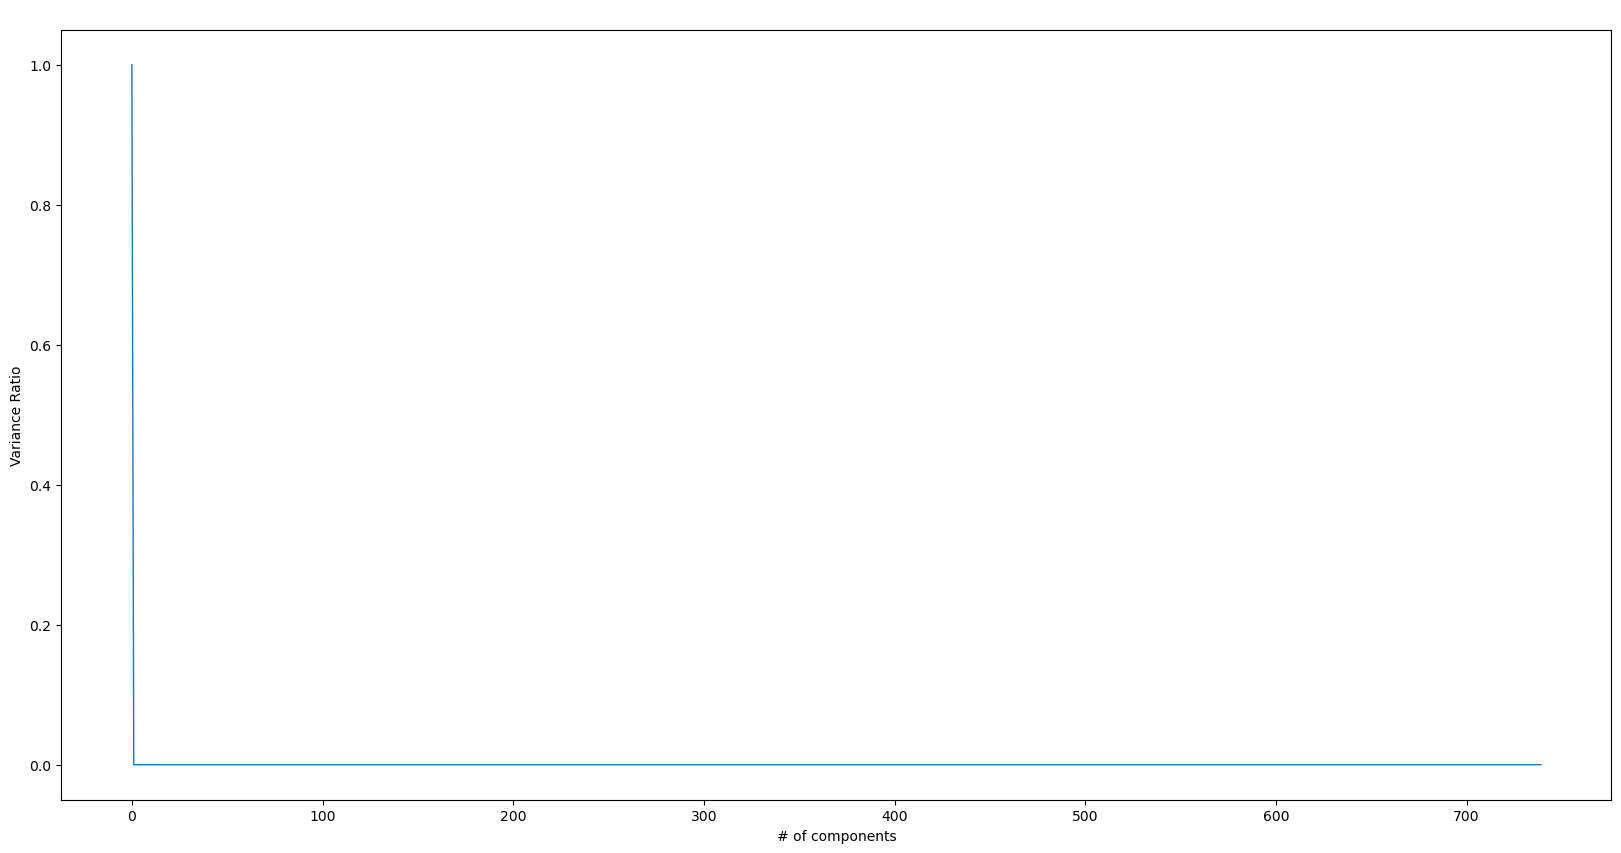

In [95]:
plt.figure(figsize=(20,10))
plt.title(' ')
plt.xlabel('# of components')
plt.ylabel('Variance Ratio')
plt.plot(PCAModel.explained_variance_ratio_,linewidth=1,alpha=1,linestyle='solid')
plt.show()

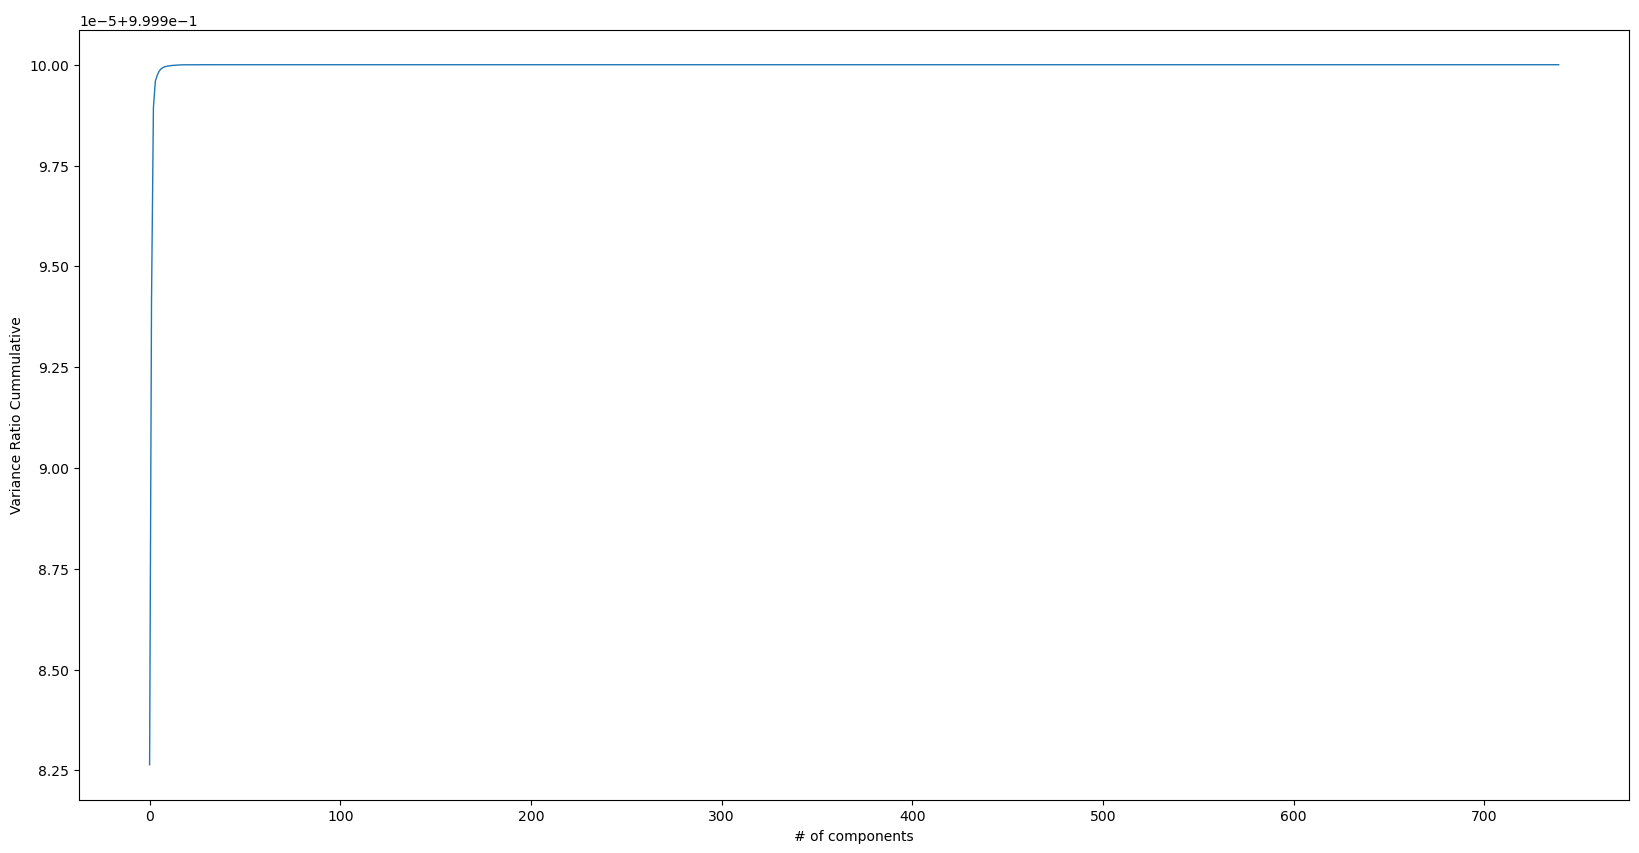

In [96]:
plt.figure(figsize=(20,10))
plt.title(' ')
plt.xlabel('# of components')
plt.ylabel('Variance Ratio Cummulative')
plt.plot([sum(PCAModel.explained_variance_ratio_[:i+1]) for i in range(len(PCAModel.explained_variance_ratio_))],linewidth=1,alpha=1,linestyle='solid')
plt.show()

In [98]:
PCAModel = PCA(n_components=100,svd_solver='auto')
PCAComp = PCAModel.fit_transform(x)
NewX = pd.DataFrame(PCAComp)
NewX.shape

(740, 100)

In [99]:
x_train,x_test,y_train,y_test = train_test_split(NewX,y,test_size=0.25,random_state=44,shuffle=True)

print("X train shape is : ",x_train.shape)
print("X test shape is : ",x_test.shape)
print("Y train shape is : ",y_train.shape)
print("Y test shape is : ",x_test.shape)

X train shape is :  (555, 100)
X test shape is :  (185, 100)
Y train shape is :  (555,)
Y test shape is :  (185, 100)


In [100]:
RandomForestClassifierModel = RandomForestClassifier(criterion='gini',n_estimators=300,max_depth=7, random_state=33)
RandomForestClassifierModel.fit(x_train,y_train)
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [101]:
y_test.values

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [102]:
results = []
for pred , actual in zip(y_pred,y_test.values):
    if pred == actual:
        results.append('Correct')
    else:
        results.append('InCorrect')
pd.Series(results).value_counts()

Correct      142
InCorrect     43
Name: count, dtype: int64